<a href="https://colab.research.google.com/github/ghommidhWassim/GNN-variants/blob/main/comparaisonModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import json

In [2]:
results_folder = "/content/filesBenchmark"  # e.g., "/content/results" if in Colab

# List to store all model metrics
all_metrics = []

# Iterate through all JSON files
for filename in os.listdir(results_folder):
    if filename.endswith(".json"):
        filepath = os.path.join(results_folder, filename)
        with open(filepath, "r") as f:
            data = json.load(f)
            all_metrics.append(data)

# Save aggregated results to a new JSON file
output_path = os.path.join(results_folder, "all_models_results.json")
with open(output_path, "w") as f:
    json.dump(all_metrics, f, indent=4)

print(f"Aggregated results saved to {output_path}")

Aggregated results saved to /content/filesBenchmark/all_models_results.json


array([[<Axes: title={'center': 'Accuracy'}, xlabel='model'>,
        <Axes: title={'center': 'Memory (MB)'}, xlabel='model'>,
        <Axes: title={'center': 'Training Time (s)'}, xlabel='model'>]],
      dtype=object)

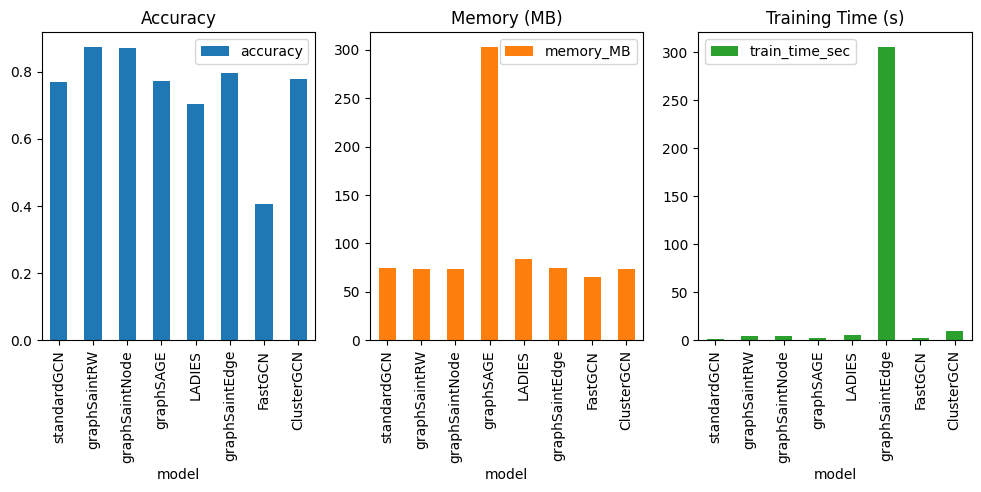

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("/content/filesBenchmark/all_models_results.json")
df.set_index("model", inplace=True)
df.plot.bar(subplots=True, layout=(1, 3), figsize=(12, 4), title=["Accuracy", "Memory (MB)", "Training Time (s)"])


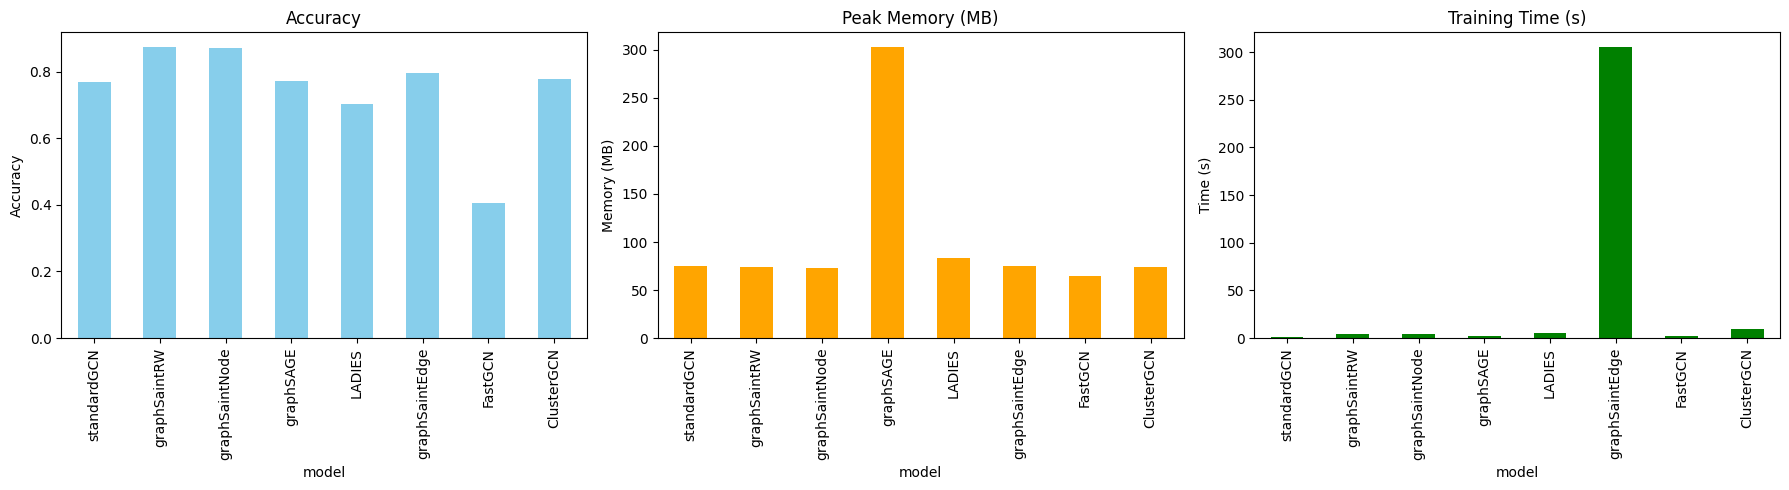

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Accuracy
df["accuracy"].plot.bar(ax=axes[0], color="skyblue", title="Accuracy")
axes[0].set_ylabel("Accuracy")

# Memory Usage
df["memory_MB"].plot.bar(ax=axes[1], color="orange", title="Peak Memory (MB)")
axes[1].set_ylabel("Memory (MB)")

# Training Time
df["train_time_sec"].plot.bar(ax=axes[2], color="green", title="Training Time (s)")
axes[2].set_ylabel("Time (s)")

plt.tight_layout()
plt.show()
